## The $N_1$ abundance

After manipulating the Boltzamann equations, we must solve the BE for the heavy right-handed neutrino (RHN) $N_1$
\begin{equation}
\frac{dY_{N_1}}{dz} = - D(z) \left( \frac{Y_{N_1}}{Y_{N_1}^{eq}}-1\right);\;\;D(z) = 2z Y_{N_1}^{eq}K_1 \frac{\mathcal{K}_1(z)}{\mathcal{K}_2(z)}
\end{equation}
where $\mathcal{K}_1$ and $\mathcal{K}_2$ are, respectively, modified Bessel functions of the 1st and 2nd kind, $K_1 = \Gamma_N/H(M_1) \in [1,100]$ is the washout parameter and 
\begin{equation*}
Y_{N_1}^{eq} =\frac{n_{N_1}^{eq}}{s} = \frac{g_N}{g_{*S}}\frac{45}{4\pi^4}I_{-1}(z);
\end{equation*}
\begin{equation}
I_{-1}(z) \equiv \int_{0}^{\infty}dx \frac{x^2}{e^{\sqrt{x^2+z^2}}+1}
\end{equation}
is the equilibrium abundance for $N_1$.

In [288]:
from timeit import default_timer as timer
import numpy as np
import math as mh
import scipy.integrate as sci
from scipy.integrate import solve_ivp, odeint, quad
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.special import kv #modified Bessel function
import latex 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer modern"
})
from numpy import pi, exp, log, sqrt, inf

## No approximation for the Modified Bessel Functions $\mathcal{K}_1$ and $\mathcal{K}_2$

In [289]:
def I_minus_1(z):
    return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)

#definition of the equilibrium N_1 abundance
def Yeq(z): 
    g_N = 2 #N_1 dof 
    g_S = 106.75 #entropy dof, the same of the SM beacuse we are above the weak scale 
    return (g_N/g_S)*(45/(4*mh.pi**4))*I_minus_1(z)[0]

z_span = np.linspace(10**(-4),10**(2.5),1000000)
Yeq_vector = [0]*len(z_span)
for i in range(len(z_span)):
    Yeq_vector[i] = Yeq_vector[i]+ Yeq(z_span[i])

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


The `rtol` and `atol` parameters are used to decrease the error of the numerical calculation, while `RK45` stands for Explicit Runge-Kutta method of order 5(4)

In [290]:
#definition of the decay intensity
def D(z,K): 
    return z*Yeq(z)*K*kv(1,z)/kv(2,z)

#the Boltzmann equation for N_1 and K_1 = 0.1
def dY_N1_1(z,Y_N1): 
    return -D(z,0.1)*(Y_N1/Yeq(z)-1)
#the Boltzmann equation for N_1 and K_1 = 1
def dY_N1_2(z,Y_N1): 
    return -D(z,1)*(Y_N1/Yeq(z)-1)
#the Boltzmann equation for N_1 and K_1 = 10
def dY_N1_3(z,Y_N1): 
    return -D(z,10)*(Y_N1/Yeq(z)-1)
#the Boltzmann equation for N_1 and K_1 = 100
def dY_N1_4(z,Y_N1): 
    return -D(z,100)*(Y_N1/Yeq(z)-1)
    
z_span = np.linspace(10**(-4),10**(2.5),1000000)
#solution for the Boltzmann equation for N_1 

start = timer()
sol_1 = odeint(dY_N1_1,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


0.3286245000199415 s


In [291]:
start = timer()
sol_2 = odeint(dY_N1_2,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


0.7403532000025734 s


In [292]:
start = timer()
sol_3 = odeint(dY_N1_3,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


0.6034531999612227 s


C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return z*Yeq(z)*K*kv(1,z)/kv(2,z)
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:13: RuntimeWarning: divide by zero encountered in divide
  return -D(z,10)*(Y_N1/Yeq(z)-1)


In [293]:
start = timer()
sol_4 = odeint(dY_N1_4,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


1.0096421000198461 s


C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return z*Yeq(z)*K*kv(1,z)/kv(2,z)
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:16: RuntimeWarning: divide by zero encountered in divide
  return -D(z,100)*(Y_N1/Yeq(z)-1)


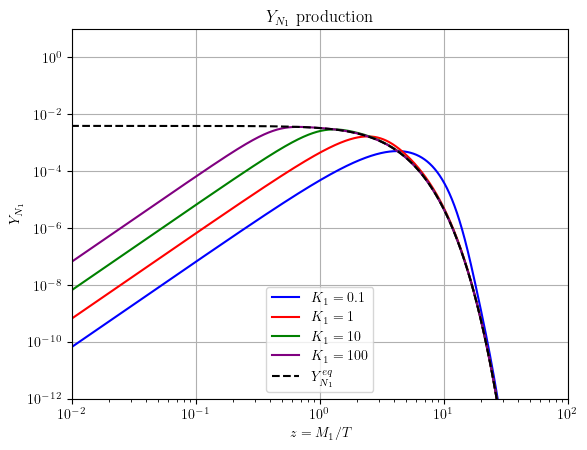

In [306]:
fig = plt.figure()
plt.plot(z_span, sol_1.T[0], color = 'blue', label = r'$K_1 = 0.1$')
plt.plot(z_span, sol_2.T[0], color = 'red', label = r'$K_1 =1$')
plt.plot(z_span, sol_3.T[0], color = 'green', label = r'$K_1 =10$')
plt.plot(z_span, sol_4.T[0], color = 'purple', label = r'$K_1 =100$')
plt.plot(z_span, Yeq_vector,'--', color = 'black', label = r'$Y_{N_1}^{eq}$')
plt.xlabel(r'$z=M_1/T$')
plt.ylabel(r'$Y_{N_1}$')
plt.legend(loc = 'lower center')
plt.xscale('log')
plt.yscale('log')
plt.title(r'$Y_{N_1}$ production')
plt.grid()
plt.ylim((10**(-12),10))
plt.xlim((10e-3,100))
plt.show()
fig.savefig('N_1 abundance.pdf', dpi=500)

# The $B-L$ abundance

The BE for the $B-L$ production is
\begin{equation}
\frac{dY_{\Delta(B-L)}}{dz} = - \epsilon_{CP}D(z) \left( \frac{Y_{N_1}}{Y_{N_1}^{eq}}-1\right)-D(z) \frac{w}{2Y_0}Y_{\Delta(B-L)};\;\;Y_0 = \frac{15}{8\pi^2g_{*}}
\end{equation}
where $$w = \frac{q_\ell^{B-L}+q_H^{B-L}}{g_\ell \zeta_\ell (q_\ell^{B-L})^2+ g_H \zeta_H (q_H^{B-L})^2}.$$ For practical purposes, we consider $w= 1$ and $\epsilon_{CP} = 10^{-7}$ 

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\374154777.py:6: RuntimeWarning: invalid value encountered in divide
  ax.plot(z, kv(1,z)/kv(2,z), color = 'green', label = r'$\frac{\mathcal{K}_1(z)}{\mathcal{K}_2(z)}$')


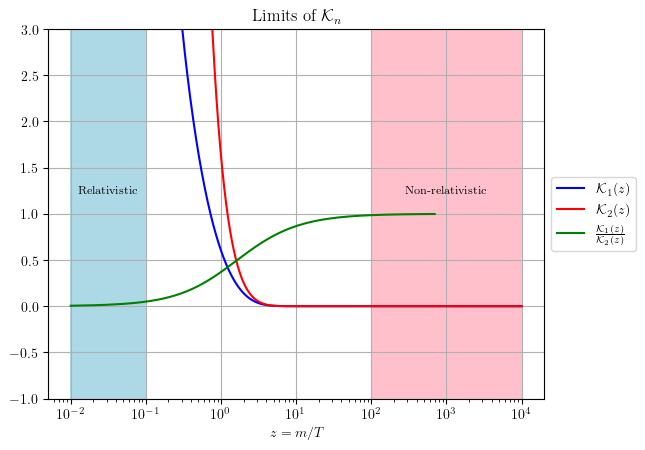

In [295]:
z = np.linspace(0.01,10e3,1000000)
y = np.linspace(-1,10,100000)
fig, ax = plt.subplots()
ax.plot(z, kv(1,z), color = 'blue', label = r'$\mathcal{K}_1(z)$')
ax.plot(z, kv(2,z), color = 'red', label = r'$\mathcal{K}_2(z)$')
ax.plot(z, kv(1,z)/kv(2,z), color = 'green', label = r'$\frac{\mathcal{K}_1(z)}{\mathcal{K}_2(z)}$')
ax.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_title(r'Limits of $\mathcal{K}_n$')
ax.set_xlabel(r'$z = m/T$')
ax.set_ylim((-1,3))
ax.fill_betweenx(np.linspace(-1,3,100000),100,10**4,color = 'pink')
ax.fill_betweenx(y,0.01,0.1,color = 'lightblue')
ax.text(10**(-1.5),1.25,'Relativistic',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.text(10**(3),1.25,'Non-relativistic',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.grid()
plt.show()
fig.savefig('limits of the modified bessel functions.pdf',bbox_inches='tight', dpi=500)

In [296]:
start = timer()
z_span = np.linspace(10**(-4),10**(2.5),1000000)
#Boltzmann equation for Y_delta = Y_{B-L} and K = 0.1
def dY_1(z,Y): #Y[0] = Y_N and Y[1]= Y_{B-L}
    epsillon = 10e-7
    w = 1 
    g_star = 106.75
    Y_0 = 15/(8*g_star*np.pi**2)
    return [-D(z,0.1)*(Y[0]/Yeq(z)-1),
            -epsillon*D(z,0.1)*(Y[0]/Yeq(z)-1)-D(z,0.1)*Y[1]*w/(2*Y_0)]
    
general_sol_1 = odeint(dY_1,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


0.7051959999953397 s


In [297]:
start = timer()
z_span = np.linspace(10**(-4),10**(2.5),1000000)
#Boltzmann equation for Y_delta = Y_{B-L} and K = 1
def dY_2(z,Y): #Y[0] = Y_N and Y[1]= Y_{B-L}
    epsillon = 10e-7
    w = 1 
    g_star = 106.75
    Y_0 = 15/(8*g_star*np.pi**2)
    return [-D(z,1)*(Y[0]/Yeq(z)-1),
            -epsillon*D(z,1)*(Y[0]/Yeq(z)-1)-D(z,1)*Y[1]*w/(2*Y_0)]
    
general_sol_2 = odeint(dY_2,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


1.7285912999650463 s


In [298]:
start = timer()
z_span = np.linspace(10**(-4),10**(2.5),1000000)
#Boltzmann equation for Y_delta = Y_{B-L} and K = 10
def dY_3(z,Y): #Y[0] = Y_N and Y[1]= Y_{B-L}
    epsillon = 10e-7
    w = 1 
    g_star = 106.75
    Y_0 = 15/(8*g_star*np.pi**2)
    return [-D(z,10)*(Y[0]/Yeq(z)-1),
            -epsillon*D(z,10)*(Y[0]/Yeq(z)-1)-D(z,10)*Y[1]*w/(2*Y_0)]
    
general_sol_3 = odeint(dY_3,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


1.3760292999795638 s


C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return z*Yeq(z)*K*kv(1,z)/kv(2,z)
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\2201829992.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return [-D(z,10)*(Y[0]/Yeq(z)-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\2201829992.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  -epsillon*D(z,10)*(Y[0]/Yeq(z)-1)-D(z,10)*Y[1]*w/(2*Y_0)]


In [299]:
start = timer()
z_span = np.linspace(10**(-4),10**(2.5),1000000)
#Boltzmann equation for Y_delta = Y_{B-L} and K = 100
def dY_4(z,Y): #Y[0] = Y_N and Y[1]= Y_{B-L}
    epsillon = 10e-7
    w = 1 
    g_star = 106.75
    Y_0 = 15/(8*g_star*np.pi**2)
    return [-D(z,10**2)*(Y[0]/Yeq(z)-1),
            -epsillon*D(z,10**2)*(Y[0]/Yeq(z)-1)-D(z,10**2)*Y[1]*w/(2*Y_0)]

#using the odeint method for K=100
general_sol_4 =odeint(dY_4,y0=[0,0],t=z_span,tfirst=True,rtol=10**(-12),atol=1e-13)
end = timer()
print(end-start,'s')

C:\Users\artur\AppData\Local\Temp\ipykernel_15292\150296218.py:2: RuntimeWarning: overflow encountered in exp
  return sci.quad(lambda x: x**2/(np.exp((x**2+z**2)**0.5)+1), 0, np.inf)


2.5199386999593116 s


C:\Users\artur\AppData\Local\Temp\ipykernel_15292\4255434385.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return z*Yeq(z)*K*kv(1,z)/kv(2,z)
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\3567152989.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return [-D(z,10**2)*(Y[0]/Yeq(z)-1),
C:\Users\artur\AppData\Local\Temp\ipykernel_15292\3567152989.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  -epsillon*D(z,10**2)*(Y[0]/Yeq(z)-1)-D(z,10**2)*Y[1]*w/(2*Y_0)]


The oserved baryon abundance according to the CMB is $Y_B^{obs} = (8.70\pm 0.06)\times 10^{-11}$. The relaton between $Y_{\Delta(B-L)}$ and $Y_B$ is given by $$Y_B = \frac{28}{79}Y_{\Delta(B-L)} \to Y_{\Delta(B-L)}^{obs} = (2.45\pm0.02)\times 10^{-10}$$

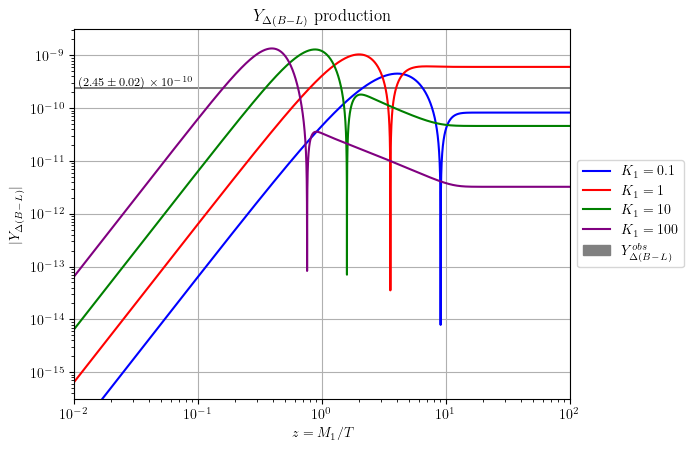

In [305]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_1.T[1]), color = 'blue', label = r'$K_1 = 0.1$')
ax.plot(z_span, abs(general_sol_2.T[1]), color = 'red', label = r'$K_1 =1$')
ax.plot(z_span, abs(general_sol_3.T[1]), color = 'green', label = r'$K_1 =10$')
ax.plot(z_span, abs(general_sol_4.T[1]), color = 'purple', label = r'$K_1 =100$')
ax.fill_between(np.linspace(10**(-2),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
                label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.set_xlabel(r'$z=M_1/T$')
ax.set_ylabel(r'$|Y_{\Delta(B-L)}|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'$Y_{\Delta(B-L)}$ production')
ax.text(10**(-1.5),10**(-9.5),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_ylim((10**(-15.5),10**(-8.5)))
ax.set_xlim((10e-3,100))
ax.grid()
plt.show()
fig.savefig('B-L abundance.pdf', bbox_inches='tight',dpi=500)

Considering the temperature of the Universe today as $T_0 = 2.7255 \text{K} = 2.34866\times 10^{-13}$ GeV and the mass of 
$N_1$ as $M_1 = 10^{14}$ GeV, then $z_0=M_1/T_0 = 4.25775\times 10^{26}$. An important question to ask ourselves it whether the 
numerical solution for the $B-L$ abundance preserves its value in this limit. One could argue that at $T= 10^{12} \text{GeV}\to z = 10^2$ sphalerons become active, suppressing the $B-L$ production trhoughout the global $U(1)_{B-L}$ conservation.

=============================================================================================================

## The efficiency factor $\eta(z)$

Another way to parameterize the Bolztmann equation for the $B-L$ production is to express the abundance in terms of 
an efficiency factor, $\eta(z)$, via 
$$Y_{\Delta(B-L)} = \epsilon_{CP} Y_{N_1}^{eq}(z\gg 1) \eta(z)$$
which yields the EDO 
$$\frac{d\eta}{dz} = \frac{D(z)}{Y_{N_1}^{eq}(z\gg 1)}\left (\frac{Y_{N_1}}{Y_{N_1}^{eq}}-1\right)+\frac{w D(z)}{2Y_0}\eta,$$
where
$$Y_{N_1}^{eq}(z\gg 1) \approx \frac{g_N}{g_{*S}}\frac{45}{4\pi^4}.$$

The efficiency parameter is only applicable at the $z\to \infty$ limit, given that we want to obtain the baryon production after the universe has cooled down. In [Leptogenesis for Pedestrians (2004)](https://arxiv.org/pdf/hep-ph/0401240), Buchmüller, Bari and Plümacher obatin the correct expression for $\eta$ in terms of the washout parameter $K$. 

They consider the dynamical production of $N_1$ assuming two conditions: $Y_{N_1}^{0} = 0$ and $Y_{N_1}^{0} = Y_{N_1}^{eq}$

### $Y_{N_1}^0 = 0$ 
$$ \eta_0(K) = -2e^{-2N(k)/3}\left(e^{2\bar{N}(K)/3}-1\right)+\frac{2}{z_B(K) K}\left(1-e^{-2z_B(K) K \bar{N}(K)}\right),$$ 
where 
$$  z_B(K) = 1+\frac{1}{2}\ln\left[1+\frac{\pi K^2}{1024}\left(\ln\left(\frac{3125\pi K^2}{1024}\right)\right)^5\right], $$ 
$$N(K) = \frac{9\pi K}{16}$$ 
and 
$$ \overline{N}(K) = \frac{N(K)}{\left(1+\sqrt{\frac{N(K)}{N_{eq}}}\right)^2};\,\, N_{eq} = \frac{3}{4}.$$

### $Y_{N_1}^0 = Y_{N_1}^{eq}$
$$ \eta_1(K) = \frac{2}{z_B(K) K}\left(1-e^{-z_B(K)K/2}\right).$$

In [302]:
#efficiency factor for Y_N^0 = 0
g_star = 106.75
Y_eq = 15/(8*pi*g_star)
Y_eq_0 = 45/(g_star*pi**4)
def zb(k):
    return 1 + 0.5 * np.log(1 + (np.pi * k**2)/1024 * (np.log((3125 * np.pi * k**2)/1024))**5)

def n(k):
    return 9 * np.pi * k / 16

def nbar(k):
    nk = n(k)
    return nk / (1 + np.sqrt(nk / 0.75))**2

def eta_0(k):
    zbk = zb(k)
    nk = n(k)
    nbk = nbar(k)
    term1 = 2 / (zbk * k) * (1 - np.exp(-2 * zbk * k * nbk / 3))
    term2 = 2 * np.exp(-2 * nk / 3) * (np.exp(2 * nbk / 3) - 1)
    return term1 - term2

In [303]:
#efficiency factor for Y_N^0 = Y_N^eq 
g_star = 106.75
Y_eq = 15/(8*pi*g_star)
Y_eq_0 = 45/(g_star*pi**4)
R = Y_eq_0/Y_eq
def eta_1(K):
    zB = 1+0.5*log(1+(pi*(K)**2/1024)*(log(3125*pi*(K)**2/1024))**5)
    return (2/(zB*K))*(1-exp(-0.5*zB*K))

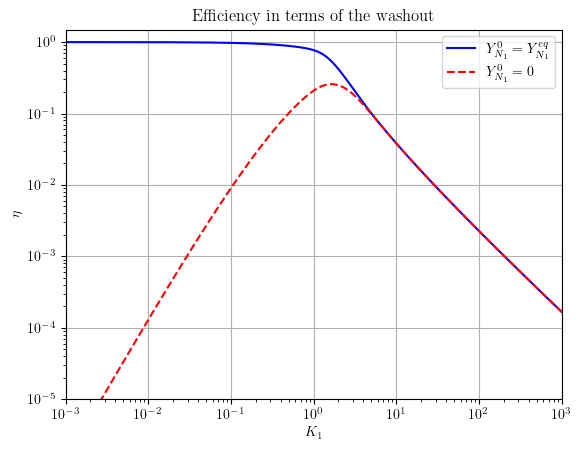

In [304]:
K_span = np.linspace(10**(-3),1000,10**6)
plt.figure()
plt.plot(K_span,eta_1(K_span),color = 'blue', label = r'$Y_{N_1}^{0} = Y_{N_1}^{eq}$')
plt.plot(K_span,eta_0(K_span),'--',color = 'red', label = r'$Y_{N_1}^{0} = 0$')
plt.xlabel(r'$K_1$')
plt.ylabel(r'$\eta$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.xlim((10**(-3),10**3))
plt.ylim((10**(-5),1.5))
plt.title('Efficiency in terms of the washout')
plt.grid()
plt.savefig('efficiency factor.pdf',dpi=500)
plt.show()